<a href="https://colab.research.google.com/github/OKJAHR/Wine_Varieties_Classifier/blob/main/%C5%9Earap_tan%C4%B1ma_%5BYSA%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data = pd.read_csv (r'/content/Wine.csv', delimiter=',', encoding = "ISO-8859-1", 
                     names = ('class','Alcohol','Malic acid','Ash','Alcalinity of ash',
                                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                                'Proanthocyanins','Color intensity','Hue','OD','Proline'))   
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
round(100 * (data.isnull().sum()/len(data)),2)

class                   0.0
Alcohol                 0.0
Malic acid              0.0
Ash                     0.0
Alcalinity of ash       0.0
Magnesium               0.0
Total phenols           0.0
Flavanoids              0.0
Nonflavanoid phenols    0.0
Proanthocyanins         0.0
Color intensity         0.0
Hue                     0.0
OD                      0.0
Proline                 0.0
dtype: float64

In [5]:
data.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.groupby('class')['class'].count()

class
1    59
2    71
3    48
Name: class, dtype: int64

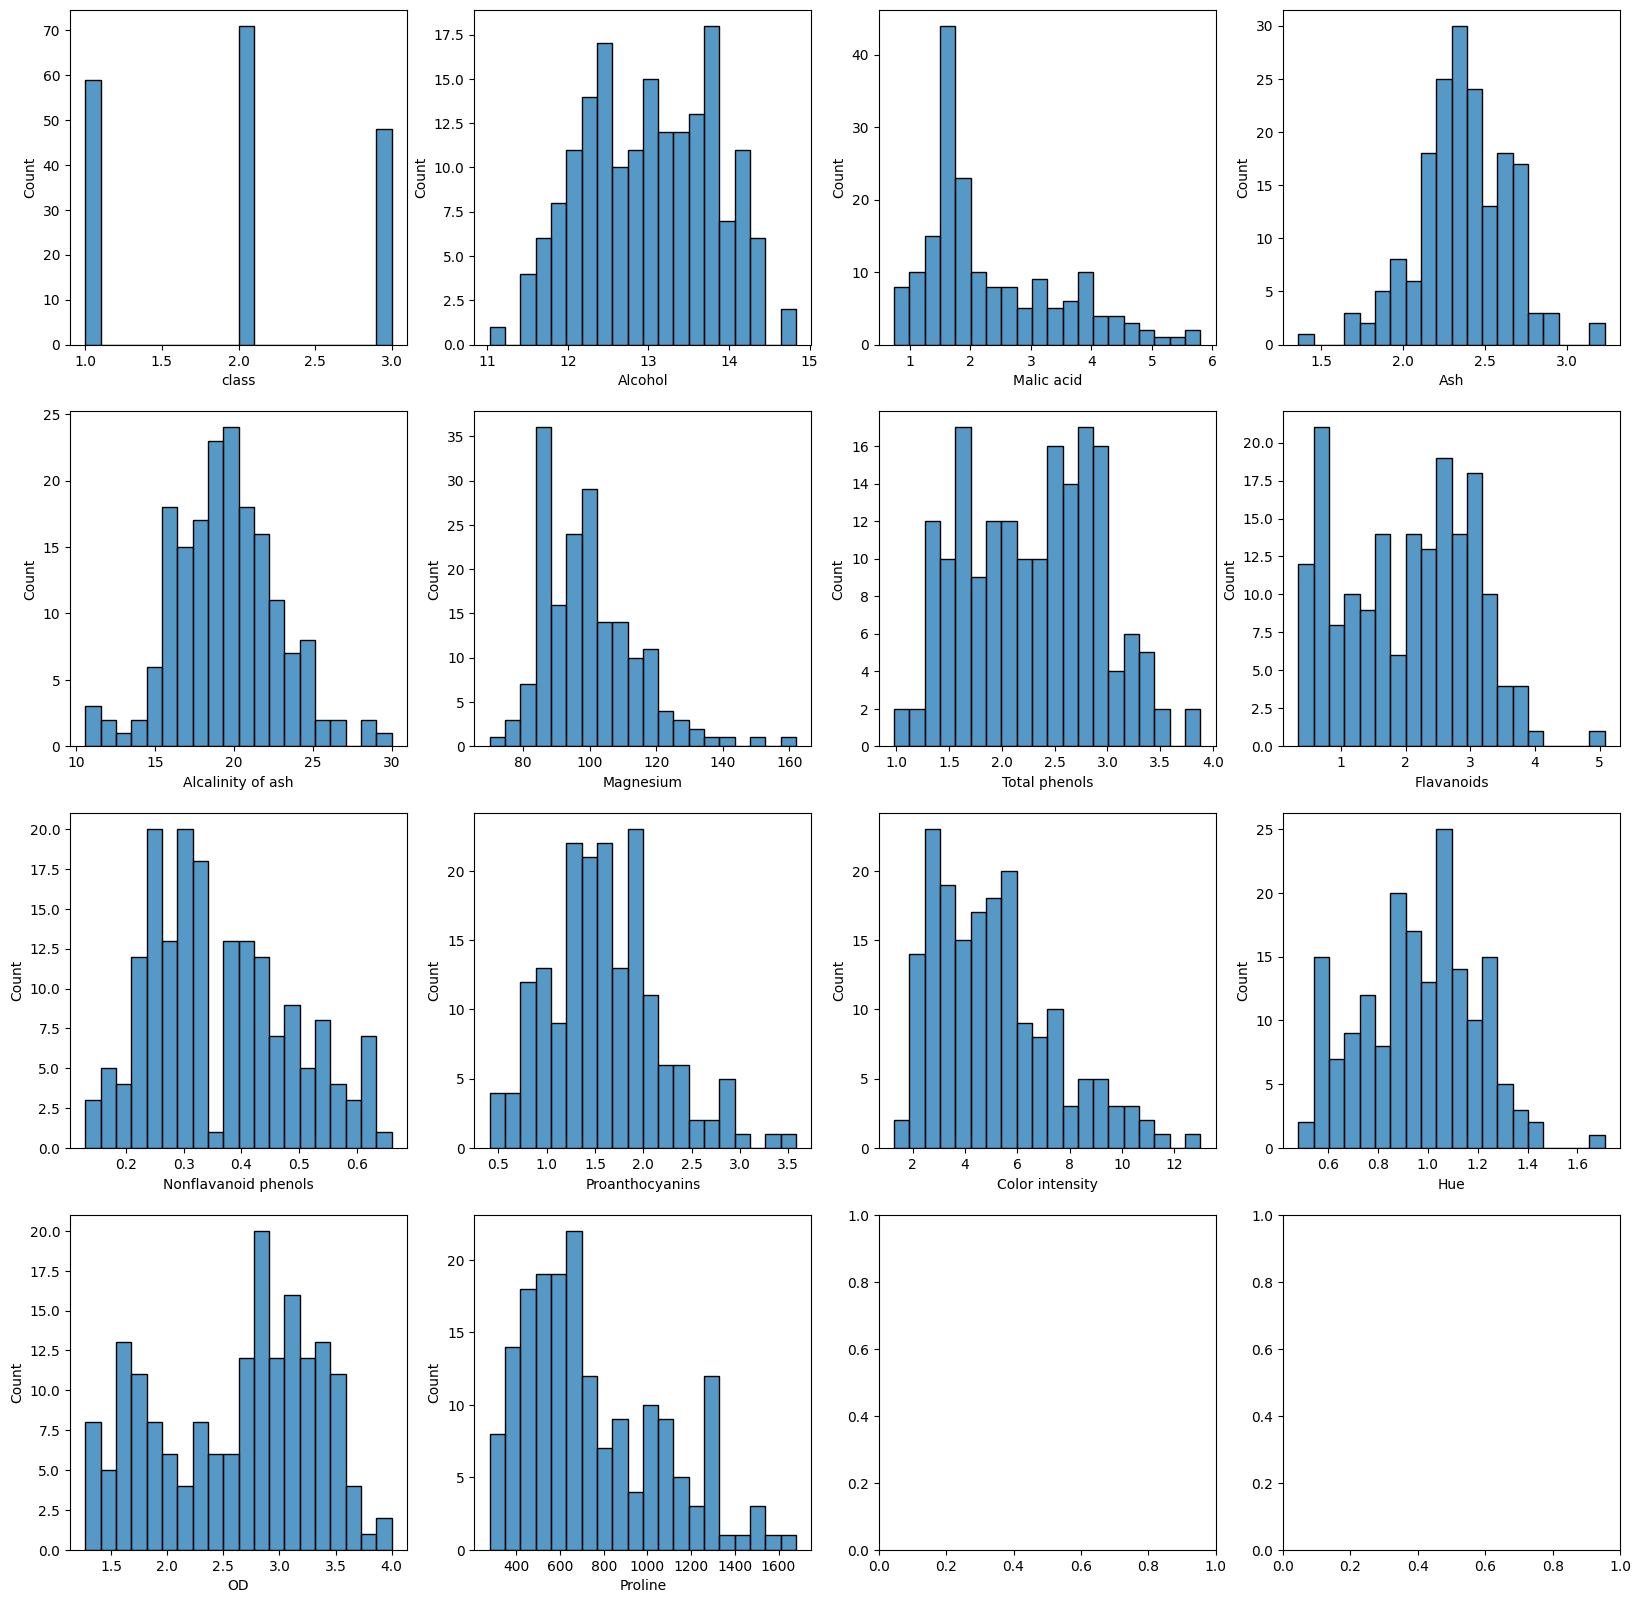

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
i = 0
j = 0
for column in data.columns :
    sns.histplot(data = data, x = column, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0

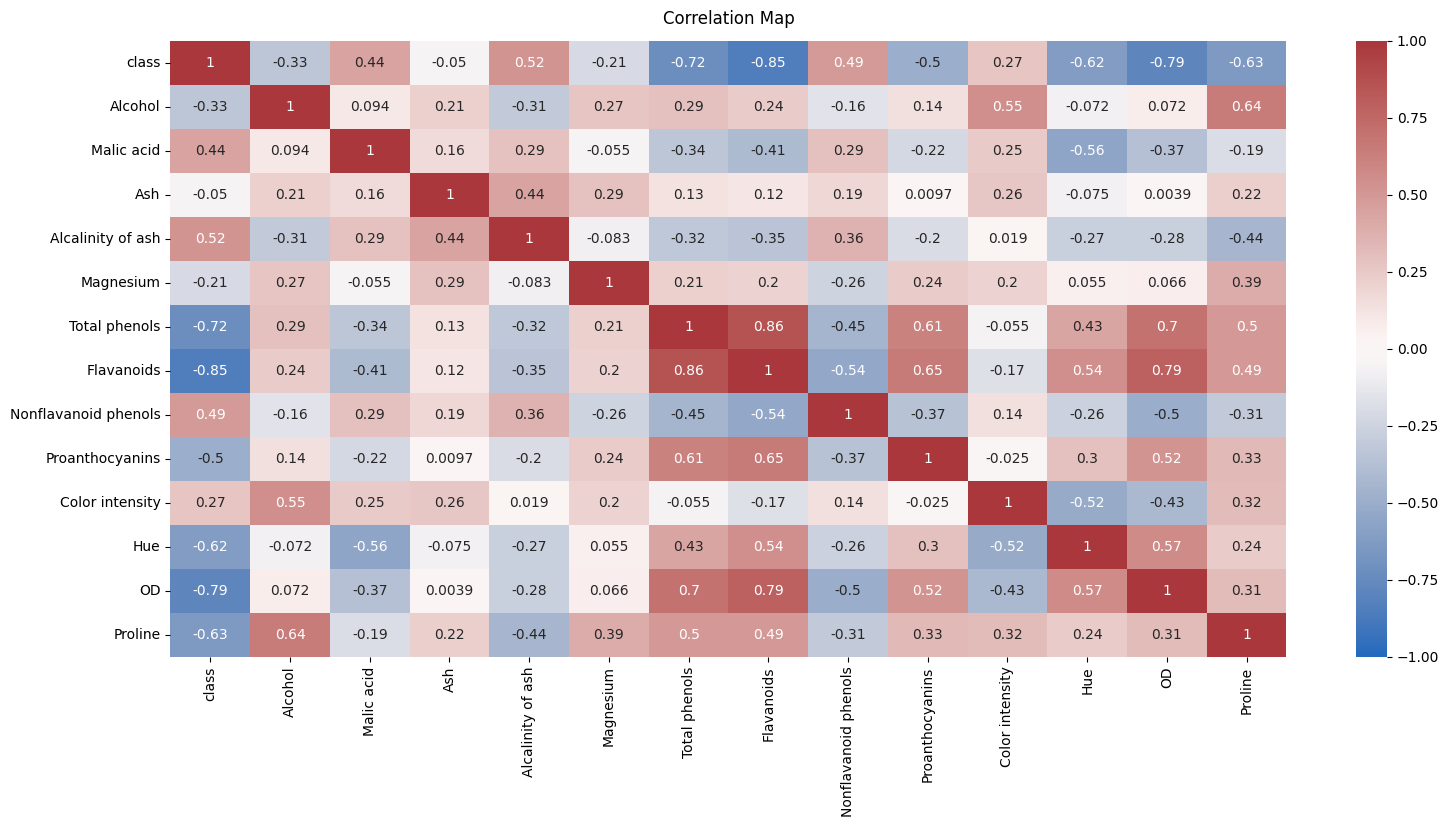

In [8]:
# korelasyon matrisi
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') 
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='Flavanoids', ylabel='Count'>

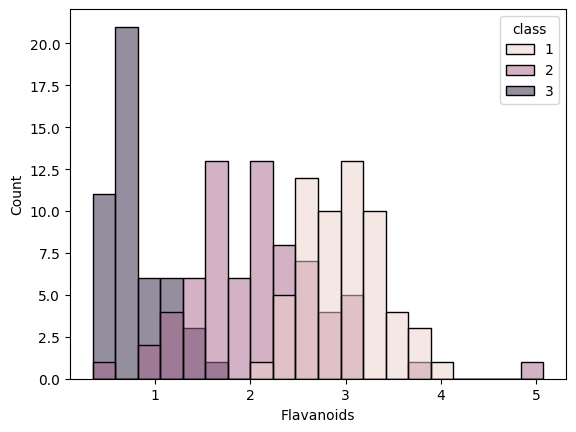

In [9]:
sns.histplot(data = data, x = 'Flavanoids', bins = 20, hue = 'class')

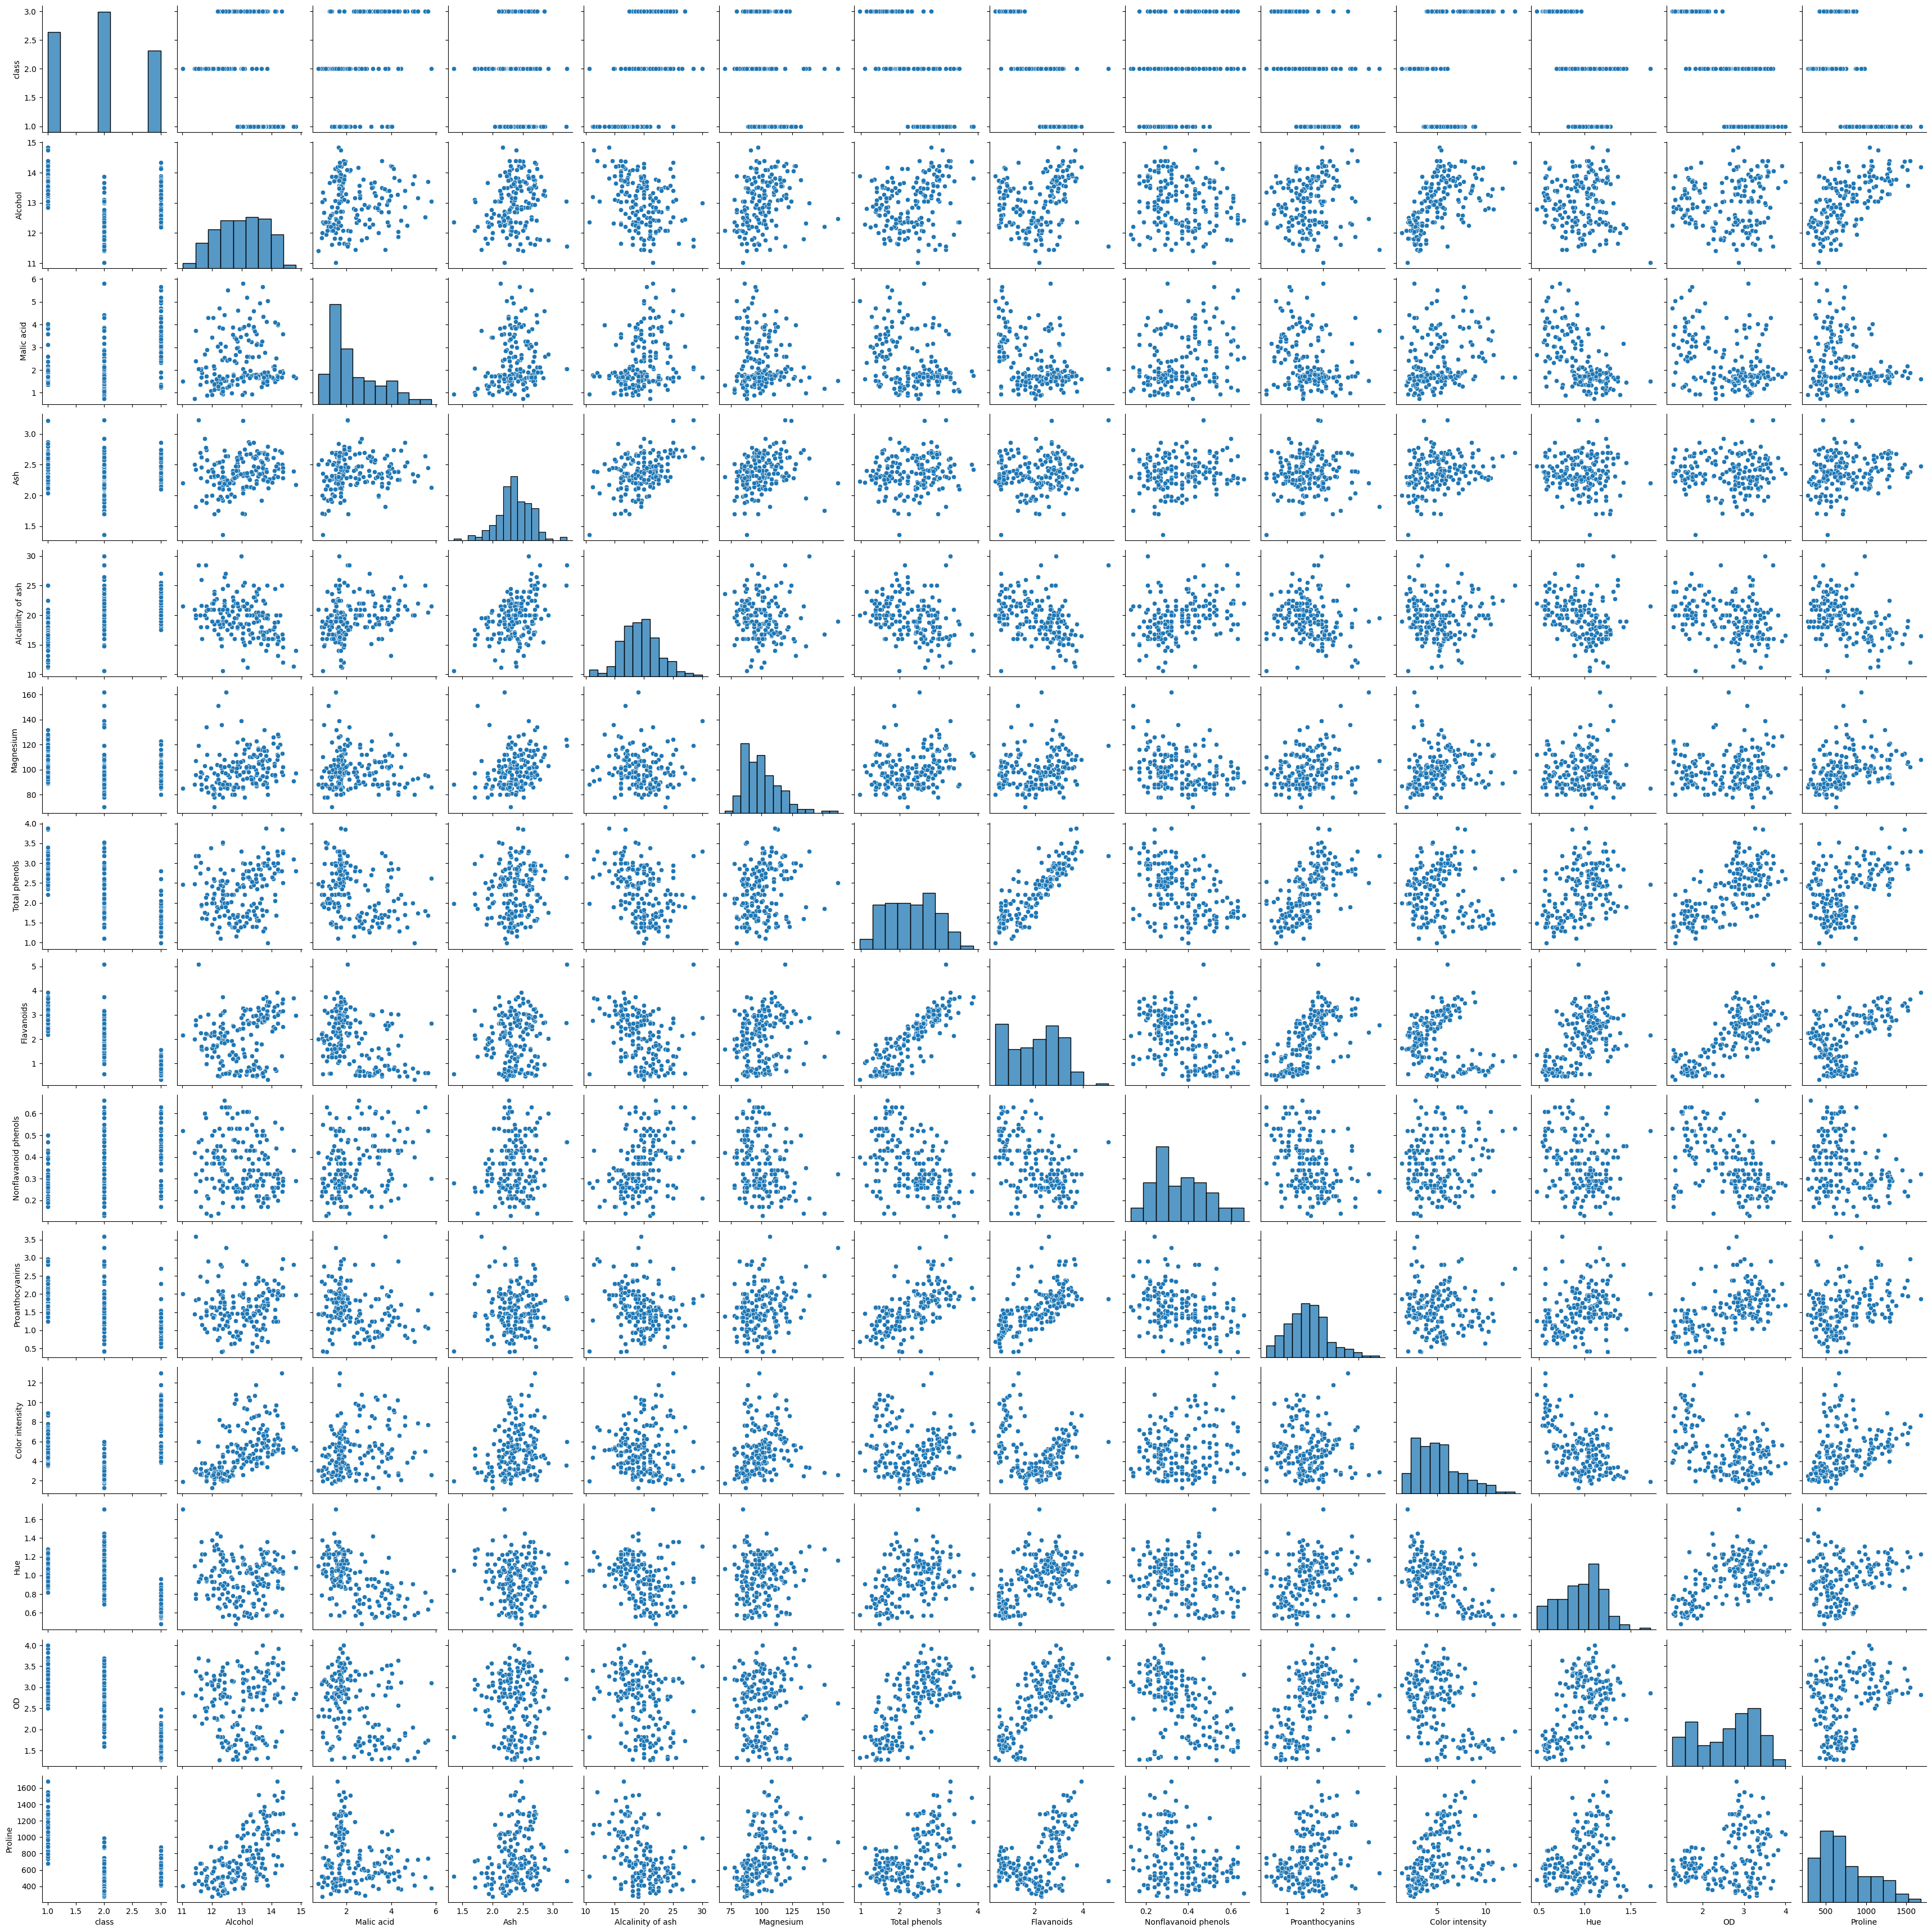

In [10]:
sns.pairplot(data = data)

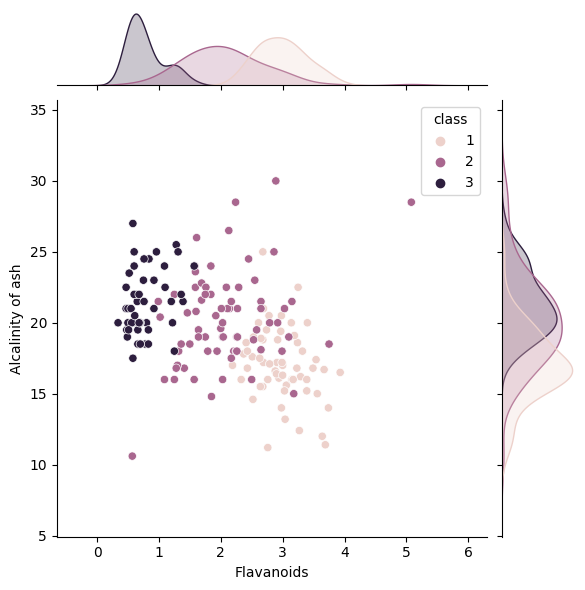

In [11]:
sns.jointplot(data=data, x='Flavanoids', y='Alcalinity of ash', hue = 'class')

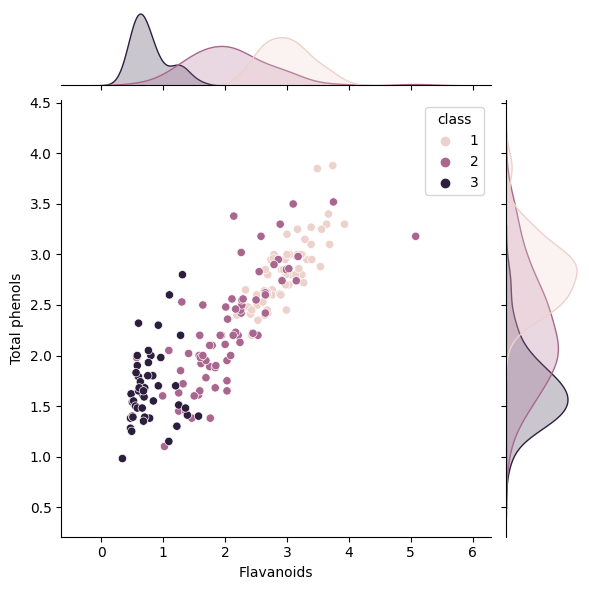

In [12]:
sns.jointplot(data=data, x='Flavanoids', y='Total phenols', hue = 'class')

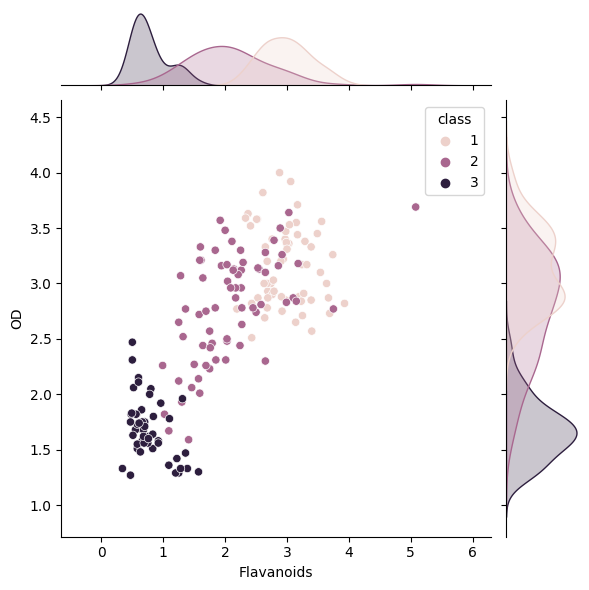

In [13]:
sns.jointplot(data=data, x='Flavanoids', y='OD', hue = 'class')

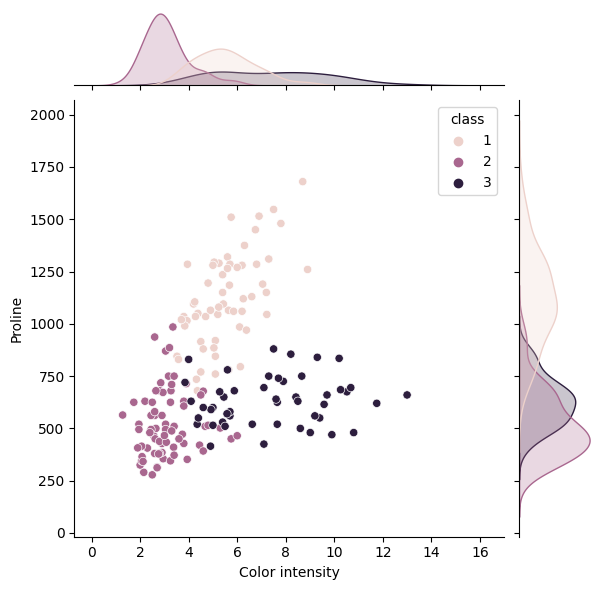

In [14]:
sns.jointplot(data=data, x='Color intensity', y='Proline', hue = 'class')

In [15]:
data.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [16]:
X = data.iloc[:,1:14]
y = data.iloc[:,0]

In [17]:
X.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,random_state=101, test_size=0.3)

In [20]:
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,90,20)
Layer2 = range(10,90,20)
Layers = len(Layer1)*len(Layer2)
Step=0
score=0

for i in Layer1 :
  for j in Layer2 :
    mlp = MLPClassifier(hidden_layer_sizes=(i,j),activation="logistic" ,random_state=1, max_iter=2000).fit(X_train, Y_train)
    y_pred_train = mlp.predict(X_train).round()
    training_accuracy.append(accuracy_score(Y_train, y_pred_train))
    y_pred_test = mlp.predict(X_test).round()
    acc_score = accuracy_score(Y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Layer2 = j
        best_Step = Step
    
    print('Step ', Step, ' of ', Layers, ' Layer1: ', i, ' Layer2: ', j, ' Accuracy', acc_score.round(4))    
    print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1, ' Best Layer2: ', best_Layer2, ' do Step:', best_Step)

Step  1  of  16  Layer1:  10  Layer2:  10  Accuracy 0.963
Best Accuracy Score 0.963  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  2  of  16  Layer1:  10  Layer2:  30  Accuracy 0.963
Best Accuracy Score 0.963  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  3  of  16  Layer1:  10  Layer2:  50  Accuracy 0.4074
Best Accuracy Score 0.963  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  4  of  16  Layer1:  10  Layer2:  70  Accuracy 0.4074
Best Accuracy Score 0.963  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  5  of  16  Layer1:  30  Layer2:  10  Accuracy 0.9815
Best Accuracy Score 0.9815  Best Layer1:  30  Best Layer2:  10  do Step: 5
Step  6  of  16  Layer1:  30  Layer2:  30  Accuracy 0.9815
Best Accuracy Score 0.9815  Best Layer1:  30  Best Layer2:  10  do Step: 5
Step  7  of  16  Layer1:  30  Layer2:  50  Accuracy 0.9815
Best Accuracy Score 0.9815  Best Layer1:  30  Best Layer2:  10  do Step: 5
Step  8  of  16  Layer1:  30  Layer2:  70  Accuracy 0.963
Best Accur

<Axes: >

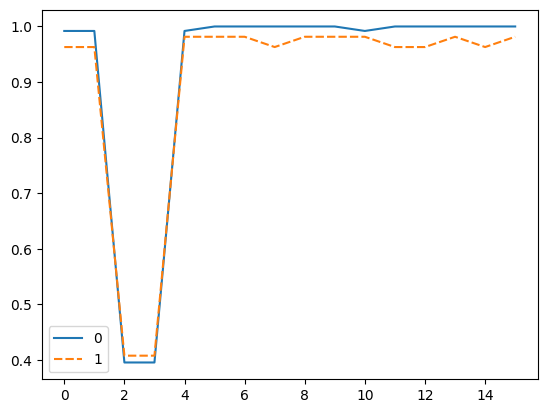

In [21]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [22]:
mlp_selected = MLPClassifier(hidden_layer_sizes=(30,10),activation="logistic" ,random_state=1, max_iter=2000)
mlp_selected.fit(X_train, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 10), max_iter=2000,
              random_state=1)

In [23]:
y_pred_train = mlp_selected.predict(X_train).round()
training_accuracy.append(accuracy_score(Y_train, y_pred_train))
y_pred_test = mlp_selected.predict(X_test).round()
acc_score = accuracy_score(Y_test,y_pred_test)
testing_accuracy.append(acc_score)

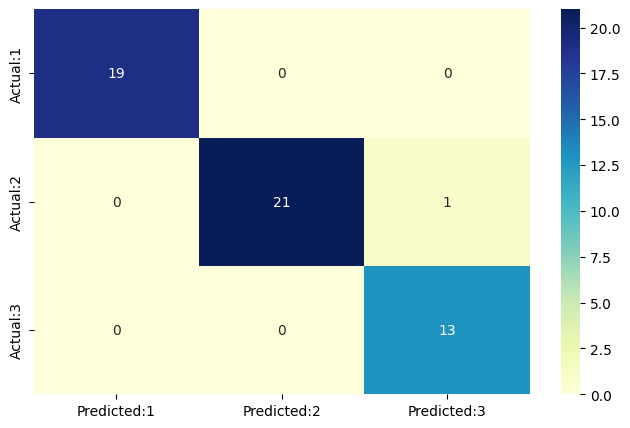

In [24]:
# Seçilen Model için Karışıklık Matrisi - 2 Katman
cm=confusion_matrix(Y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],index=['Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

<Axes: >

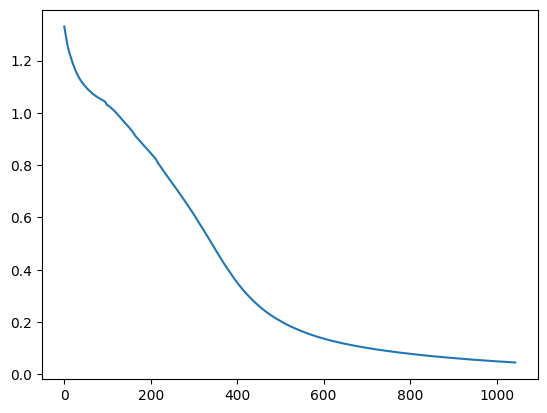

In [25]:
sns.lineplot(data=mlp_selected.loss_curve_)

In [26]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        22
           3       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

